<h1 align="center">Volume 4: Inverse Problems.</h1>

    NAME Caelan osman
    Section 1
    DATE Feb. 2, 2022

In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

In [2]:
def find_t(f, a, b, alpha, beta, t0, t1, maxI):
    sol1 = 0    # Just be careful that t0 != t1 and sol1 != beta
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f, np.array([alpha, t0]), [a,b], atol=1e-10)[1,0]
        sol1 = odeint(f, np.array([alpha, t1]), [a,b], atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1 - t0)/(sol1 - sol0)    # This is the update function
        t0 = t1
        t1 = t2
        i = i + 1
    if i == maxI:
        print("t not found")
    return t2

def solveSecant(f, X, a, b, alpha, beta, t0, t1, maxI):
    '''
    First find the derivative t that forces the differential equation to begin and end where you want.
    Then graph the solution.
    '''
    t = find_t(f, a, b, alpha, beta, t0, t1, maxI)
    sol = odeint(f, np.array([alpha, t]), X, atol=1e-10)[:,0]
    return sol

# Problem 1

Appropriately defined initial value problems will usually have a unique solution.
Boundary value problems are not so straightforward; they may have no solution or they may
have several. You may have to determine which solution is physically interesting. The following
bvp has at least two solutions. Using the secant method, find and plot both numerical solutions and
their initial slopes. What initial values t0, t1 did you use
to find them?

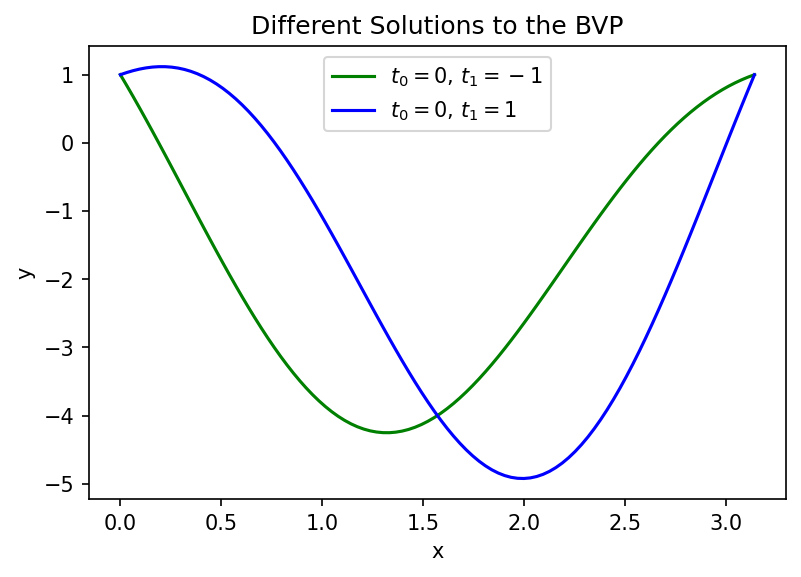

In [16]:
def problem1():
    #define ode system
    def ode(y, x):
        return np.array([y[1], -4*y[0] - 9*np.sin(x)])
    
    #set x linspace    
    X = np.linspace(0, np.pi, 100)
    #get two different solutions
    Y1 = solveSecant(ode, X, 0, np.pi, 1, 1, 0, -1, 40)
    Y2 = solveSecant(ode, X, 0, np.pi, 1, 1, 0, 1, 40)
    
    #plot
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(X, Y1, 'g-', label=r'$t_0 = 0$, $t_1 = -1$')
    ax.plot(X, Y2, 'b-', label=r'$t_0 = 0$, $t_1 = 1$')
    ax.legend(loc='upper center')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Different Solutions to the BVP')
    plt.show()
    
    return

problem1()

# Problem 2

Use Newton's method to solve the BVP
\begin{align}
y'' &= 3 + \frac{2y}{x^2},\quad x \in [1, e],\\
y(1) &= 6, \\
y(e) &= e^2 + \frac{6}{e}.
\end{align}
Plot your solution.

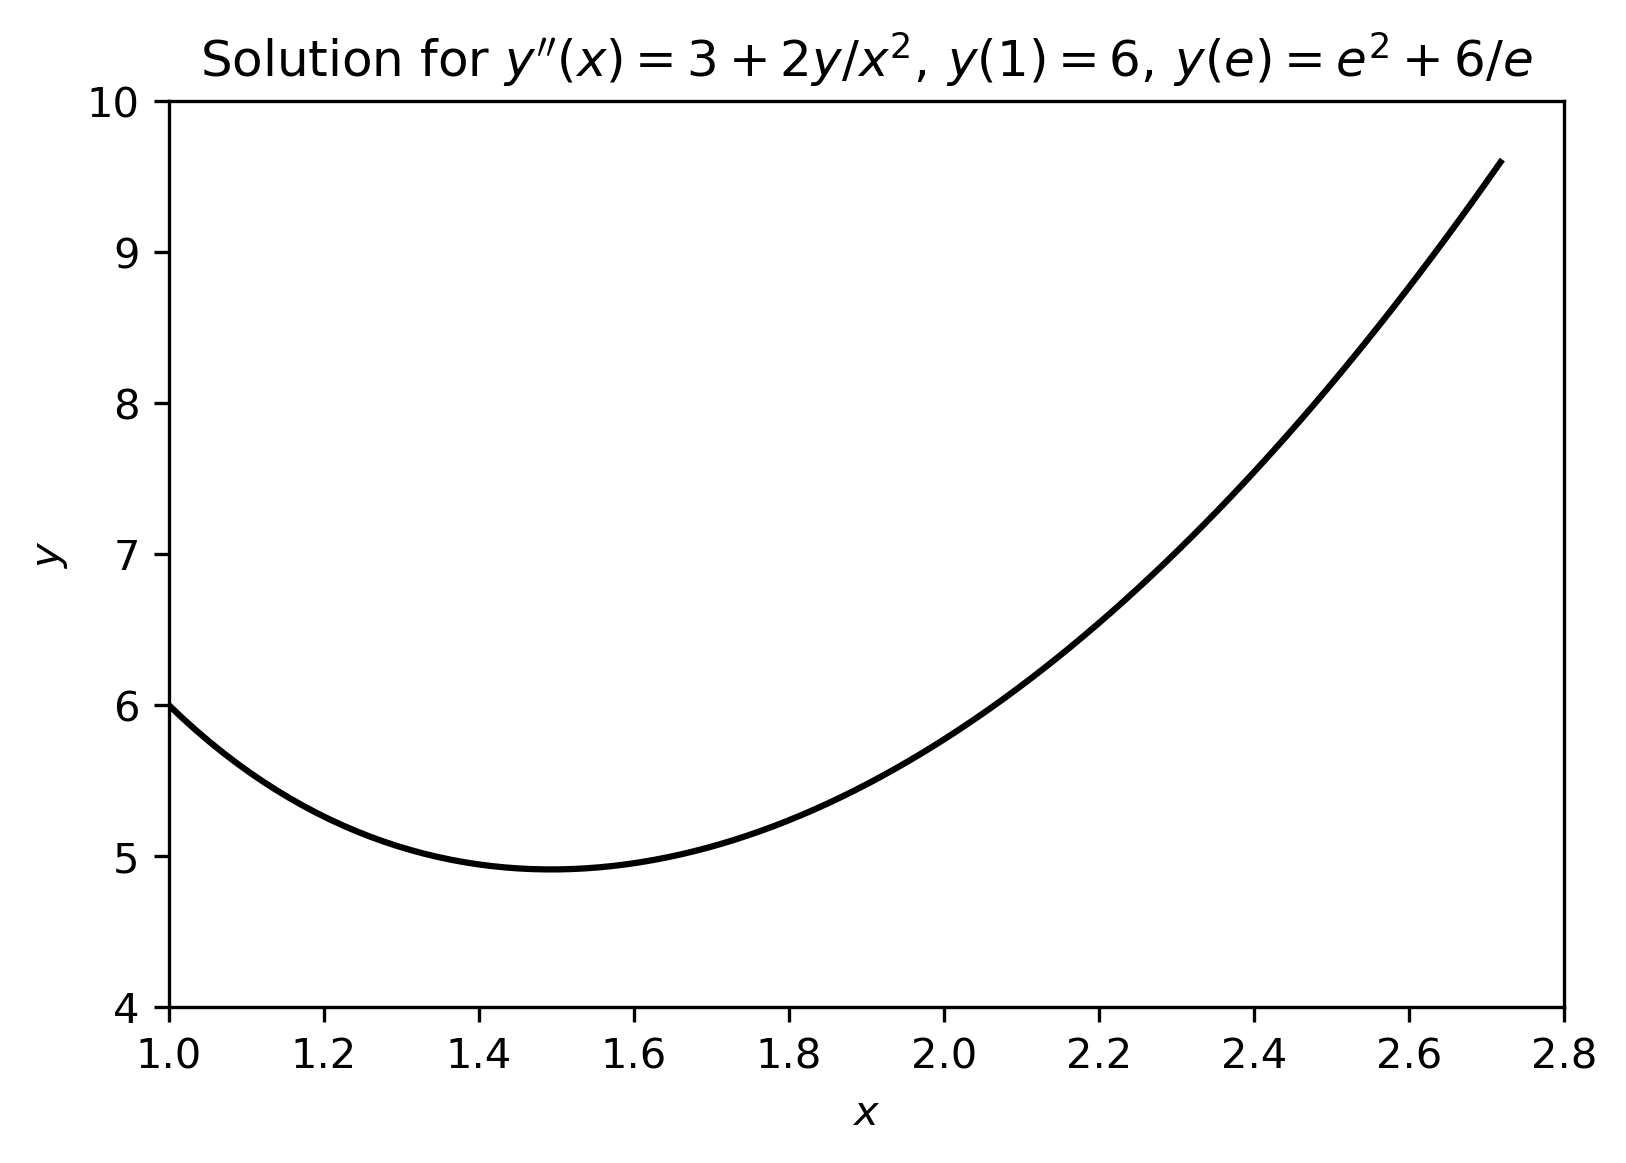

In [58]:
def find_t_newton(f, a, b, α, β, ξ, δ, t0, maxI):
    soly = 0
    i = 0
    while abs(soly - β) > 10**-8 and i < maxI:
        # solve for current solution
        sol = odeint(f, np.array([α, t0, ξ, δ]), [a, b], atol=1e-10)
        # get y and z solutions
        soly = sol[1, 0]
        solz = sol[1, 2]
        #update using newton's method
        t0 = t0 - (soly - β)/solz 
        #increment i
        i = i + 1
    if i == maxI:
        print("t not found")
    return t0

def solveNewton(f, X, a, b, α, β, ξ, δ, t0, maxI):
    '''
    First find the derivative t that forces the differential equation to begin and end where you want.
    Then graph the solution.
    '''
    #find the correct t
    t = find_t_newton(f, a, b, α, β, ξ, δ, t0, maxI)
    #return the appropriate solution
    sol = odeint(f,np.array([α, t, ξ, δ]), X,atol=1e-10)[:,0]
    return sol

def problem2():
    # define ode system
    def ode(u, x):
        return np.array([u[1], 3+ 2*u[0]/x**2, u[3], 2*u[2]/x**2])
    
    # get linspace of points
    X = np.linspace(1, np.exp(1), 100)
    # create constants
    a, b = 1, np.exp(1)
    α, β = 6, np.exp(2) + 6/np.exp(1)
    t0 = (β-α)/(b-a)
    ξ, δ = 0, 1
    maxI = 40
    # call or Newton solver and get the solution
    Y = solveNewton(ode, X,a, b, α, β, ξ, δ, t0, maxI)
    #plot
    fig = plt.figure()
    fig.set_dpi(300)
    ax = fig.add_subplot(111)
    ax.plot(X, Y, 'k-')
    ax.set_xlabel(rf'$x$')
    ax.set_ylabel(rf'$y$')
    ax.set_xticks(np.arange(1, 3, 0.2))
    ax.set_yticks(np.arange(4, 11,1))
    ax.set_xlim([1, 2.8])
    ax.set_title(r"Solution for $y^{\prime \prime}(x) = 3 + 2y/x^2,\, y(1) = 6, \, y(e) = e^2 + 6/e$")
    plt.show()
    
    return 


problem2()

# Problem 3

Suppose a projectile is fired from a cannon with velocity 45 m/s2
. At what angle
θ(0) should it be fired to land at a distance of 195 m?
There should be two initial angles θ(0) that produce a solution for this bvp. Use the
secant method to numerically compute and then plot both trajectories.
dy
dx = tan θ,
dv
dx = −
g sin θ + µv2
v cos θ
,
dθ
dx = −
g
v
2
,
y(0) = y(195) = 0,
v(0) = 45 m/s2
(20.8)
(g = 9.8067 m/s2
.) Find and plot both solutions for this boundary value problem when µ = .0003.
Compare with the solutions when µ = 0.

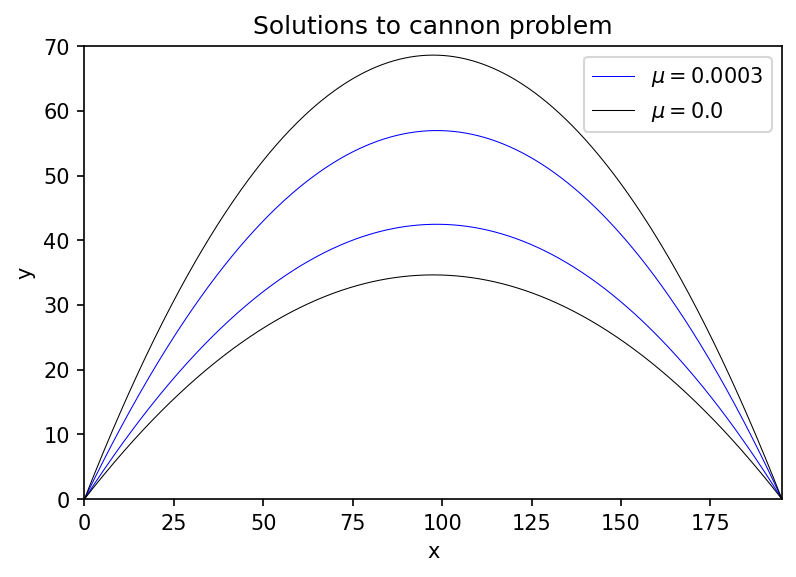

In [54]:
def problem3():
    
    #redefine find t function so we can solve it with 3 functions
    def find_t_3(f, a, b, α, β, ξ, t0, t1, maxI, args):
        sol1 = 1    # Just be careful that t0 != t1 and sol1 != beta
        i = 0
        while abs(sol1-β) > 10**-8 and i < maxI:
            #first solution
            sol0 = odeint(f, np.array([α, ξ, t0]), [a,b], args=args, atol=1e-10)[1,0]
            #second solution
            sol1 = odeint(f, np.array([α, ξ, t1]), [a,b], args = args, atol=1e-10)[1,0]
            #update with secant method
            t2 = t1 - (sol1 - β)*(t1-t0)/(sol1-sol0) 
            t0 = t1
            t1 = t2
            i = i+1
        if i == maxI:
            print("t not found")
        return t2

    #redefine the solve secant function for 3 functions
    def solveSecant_3(f, X, a, b, α, β, ξ, t0, t1, maxI, args):
        '''
        First find the derivative t that forces the differential equation to begin and end where you want.
        Then graph the solution.
        '''
        #find appropriate t
        t = find_t_3(f, a, b, α, β, ξ, t0, t1, maxI, args)
        #solve and return solution
        sol = odeint(f, np.array([α, ξ, t]), X, args = args, atol=1e-10)[:,0]
        return sol
    
    #define ode system
    def ode(u, x, μ, g):
        return np.array([np.tan(u[2]), -(g*np.sin(u[2]) + μ*u[1]**2)/(u[1]*np.cos(u[2])), -g/(u[1]**2)])
    
    
    #initialize constant values and linspace
    g = 9.8067
    μ1 = 0.0003
    μ2 = 0.0
    a, b = 0, 195
    α, β, ξ = 0, 0, 45        
    X = np.linspace(a, b, 1000)
    maxI = 40
    #initialize guesses
    t0 = (β - α)/(b-a)
    t1 = 2
    # Solve with nonzero μ
    Y1 = solveSecant_3(ode, X, a, b, α, β, ξ, t0, t1, maxI, (μ1, g))
    Y2 = solveSecant_3(ode, X, a, b, α, β, ξ, 12, -5 , maxI, (μ1, g))
    # Solve with zero μ
    Y3 = solveSecant_3(ode, X, a, b, α, β, ξ, t0, t1, maxI, (μ2, g))
    Y4 = solveSecant_3(ode, X, a, b, α, β, ξ, t0, 100, maxI, (μ2, g))
    
    
    #plot solutions
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(X, Y1, 'b-', lw=0.5, label=r'$\mu = 0.0003$')
    ax.plot(X, Y2, 'b-', lw=0.5)
    ax.plot(X, Y3, 'k-', lw=0.5, label=r'$\mu = 0.0$')
    ax.plot(X, Y4, 'k-', lw=0.5)
    ax.legend(loc='best')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Solutions to cannon problem')
    ax.set_ylim([0, 70])
    ax.set_xlim([0, 195])
    plt.show()
    
    
    return
problem3()
    
    
    
    